In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore','futurewarning')

%matplotlib inline

# **Load the data**

In [35]:
transact_df = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\data.csv')

# **Inspections**

In [36]:
transact_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [37]:
transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [38]:
transact_df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [39]:
# Checking the balance of the data
print('The number of Non-Frauds are: ' + str(transact_df['FraudResult'].value_counts()[0]) + ' which is', round(transact_df['FraudResult'].value_counts()[0]/len(transact_df) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(transact_df['FraudResult'].value_counts()[1]) + ' which is', round(transact_df['FraudResult'].value_counts()[1]/len(transact_df) * 100,2), '% of the dataset')

The number of Non-Frauds are: 95469 which is 99.8 % of the dataset
The number of Frauds are: 193 which is 0.2 % of the dataset


# **Data Cleaning and Preprocessing**

In [40]:
# Convert TransactionStartTime to datetime
transact_df["TransactionStartTime"] = pd.to_datetime(transact_df["TransactionStartTime"])

# Extract Date-Time Features
transact_df["Year"] = transact_df["TransactionStartTime"].dt.year
transact_df["Month"] = transact_df["TransactionStartTime"].dt.month
transact_df["Day"] = transact_df["TransactionStartTime"].dt.day
transact_df["Hour"] = transact_df["TransactionStartTime"].dt.hour
transact_df["Weekday"] = transact_df["TransactionStartTime"].dt.weekday
transact_df["IsWeekend"] = transact_df["Weekday"].isin([5, 6]).astype(int)

In [41]:
# Convert categorical columns to category dtype
categorical_cols = ["ProviderId", "ProductId", "ProductCategory", "ChannelId", "CurrencyCode", "AccountId", "CustomerId"]
transact_df[categorical_cols] = transact_df[categorical_cols].astype("category")

In [42]:
# Remove duplicates if any
transact_df.drop_duplicates(inplace=True)

In [43]:
transact_df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis**

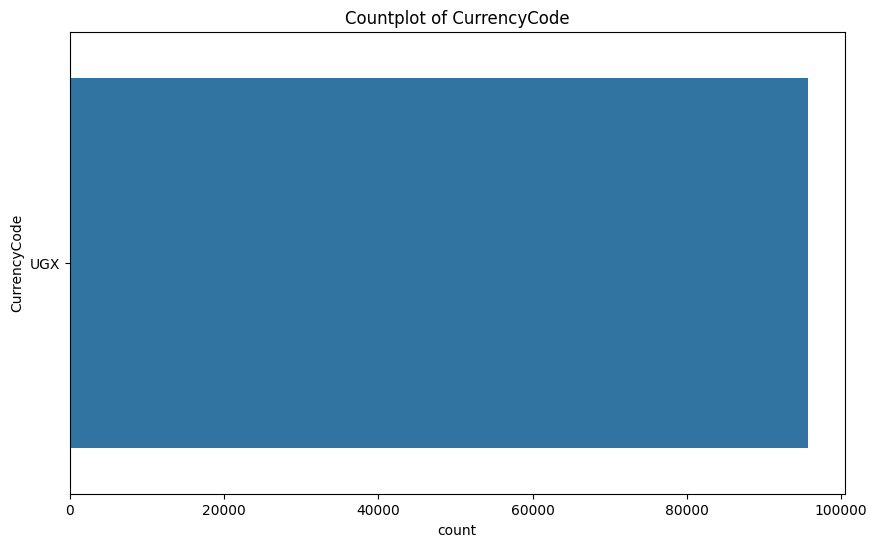

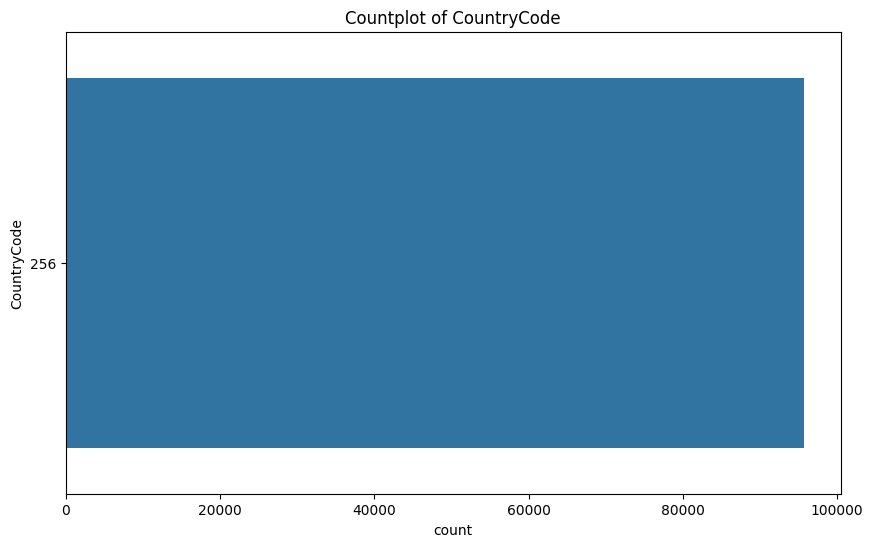

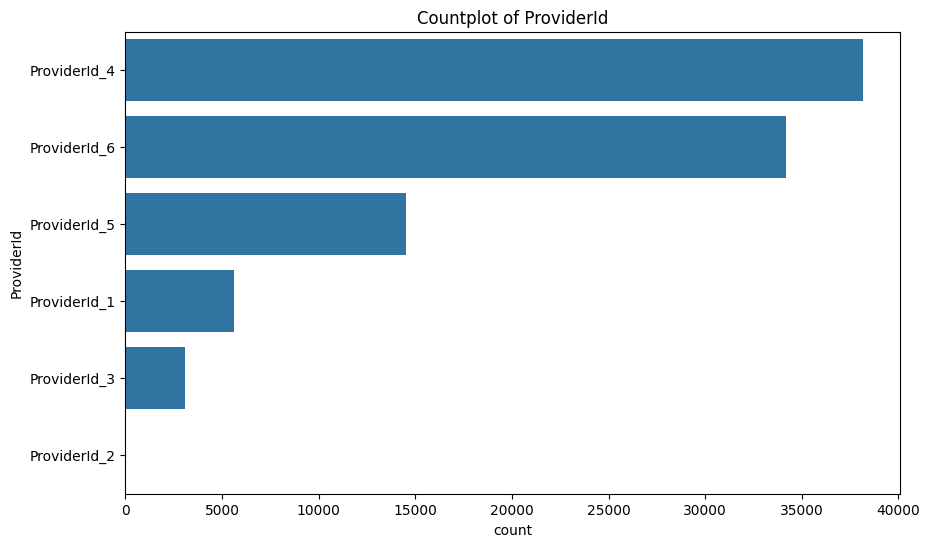

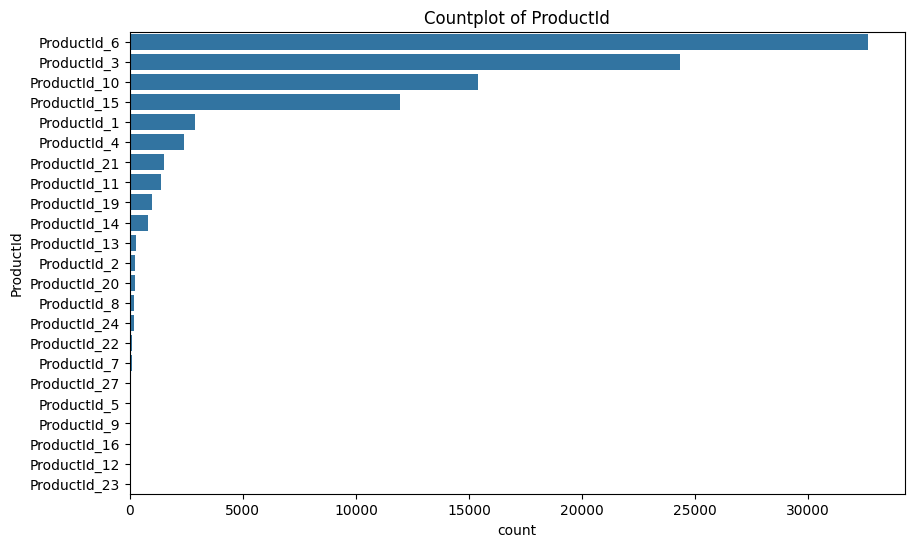

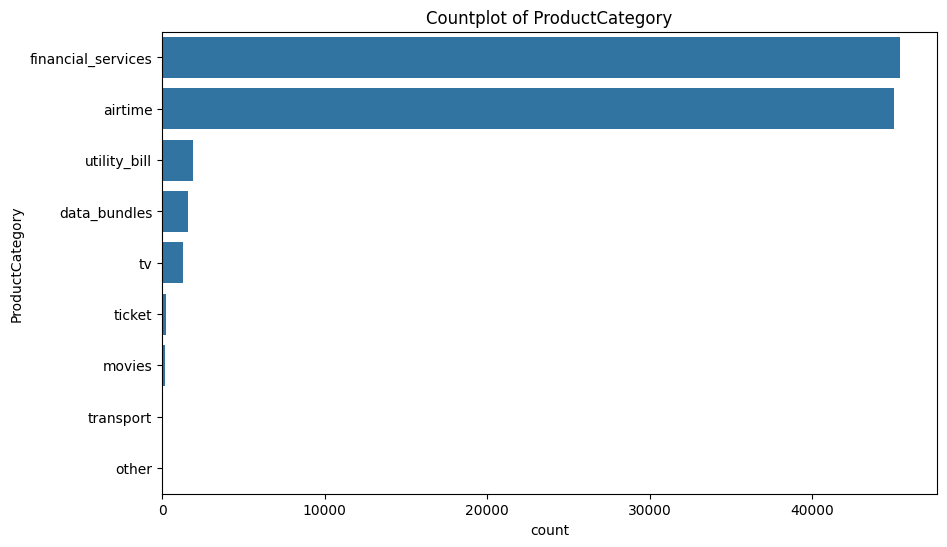

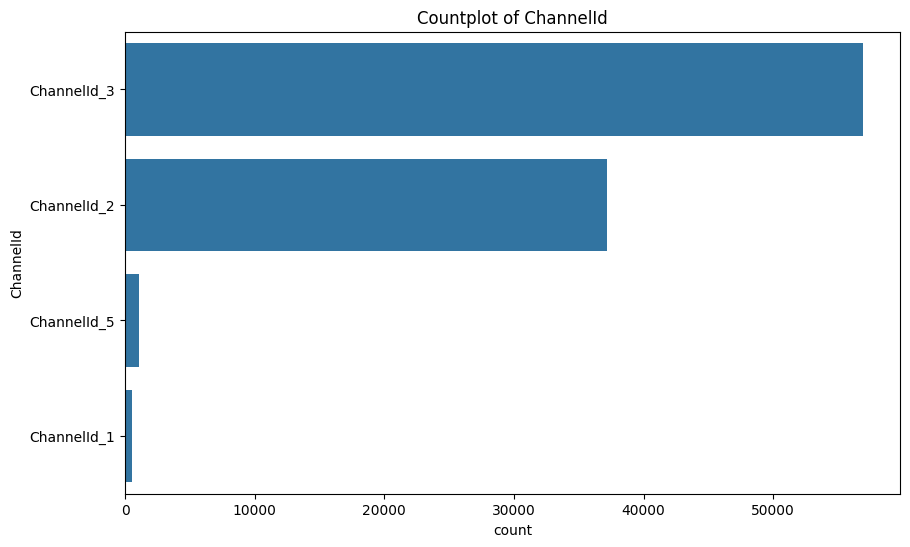

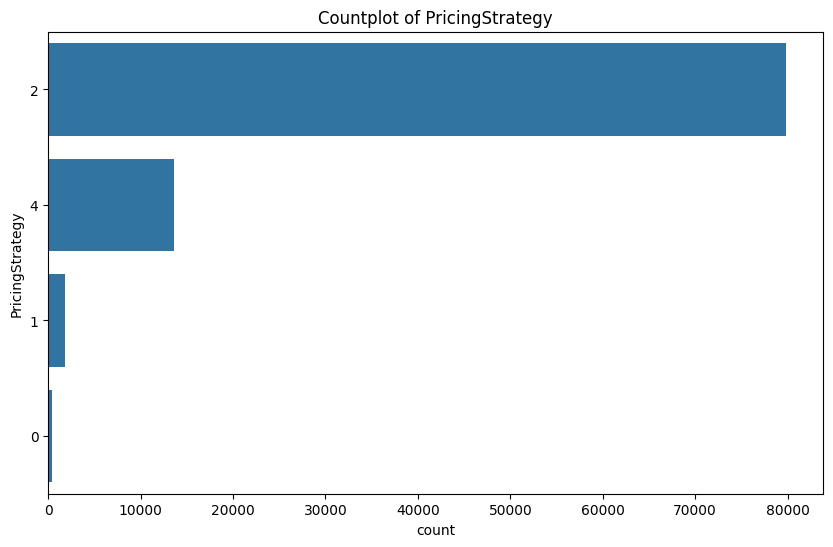

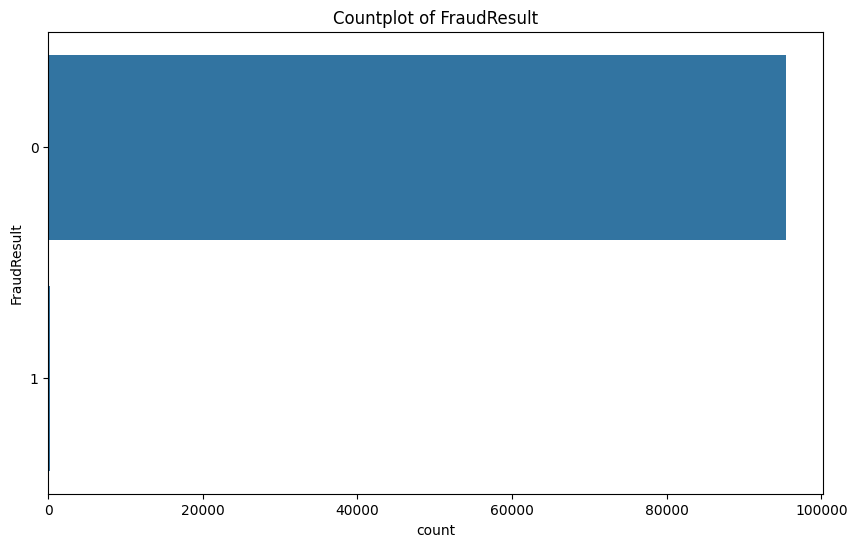

In [44]:
categorical_features = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=transact_df[col], order=transact_df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

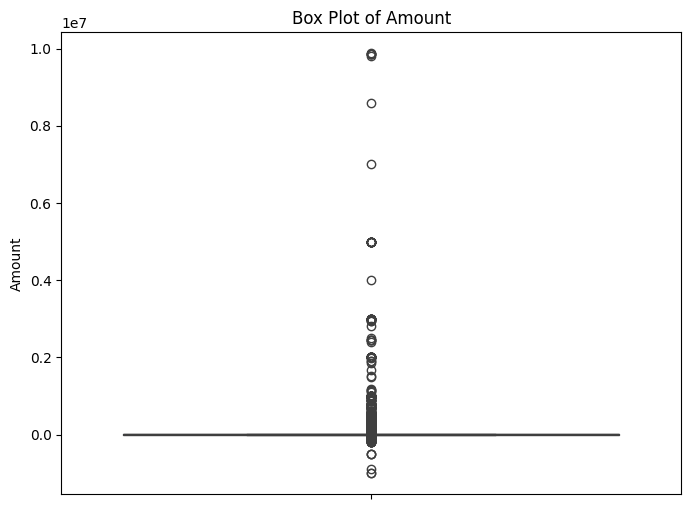

In [45]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=transact_df['Amount'])
plt.title('Box Plot of Amount')
plt.show()

In [46]:
# Correlation Analysis
# Select numeric columns
selected_columns = ['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'IsWeekend']

# Select only the specified columns and ensure they are numeric
numeric_df = transact_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix_default = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix_default)

                   Amount     Value  PricingStrategy  FraudResult  IsWeekend
Amount           1.000000  0.989692        -0.061931     0.557370   0.003825
Value            0.989692  1.000000        -0.017020     0.566739  -0.007997
PricingStrategy -0.061931 -0.017020         1.000000    -0.033821  -0.067165
FraudResult      0.557370  0.566739        -0.033821     1.000000   0.000043
IsWeekend        0.003825 -0.007997        -0.067165     0.000043   1.000000


In [47]:
# Drop the irrelevant columns from the dataset
transact_df.drop(["CurrencyCode", "CountryCode","Value", "Year"], axis=1, inplace=True) # Value is highly correlated with Amount and Year has a high VIF (27.64) and doesn’t show strong correlation with other features. So, I drop it.

In [48]:
# Select only numeric columns
numeric_cols = ["Amount", "PricingStrategy", "FraudResult", "Month", "Day", "Hour", "Weekday", "IsWeekend"]

# Select only the specified columns and ensure they are numeric 
numeric_df = transact_df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix_final = numeric_df.corr()

# Compute VIF for each numeric column
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(transact_df[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display results
print(vif_data)

           Feature       VIF
0           Amount  1.456454
1  PricingStrategy  5.842323
2      FraudResult  1.454051
3            Month  2.627579
4              Day  3.780024
5             Hour  5.741784
6          Weekday  5.711999
7        IsWeekend  2.272089


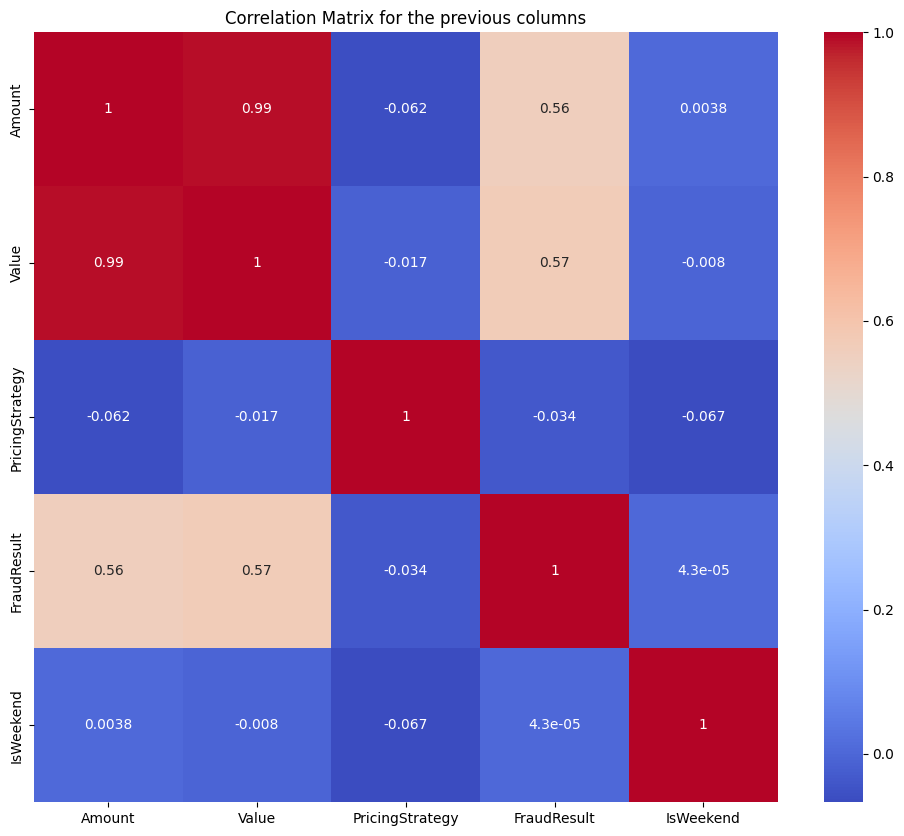

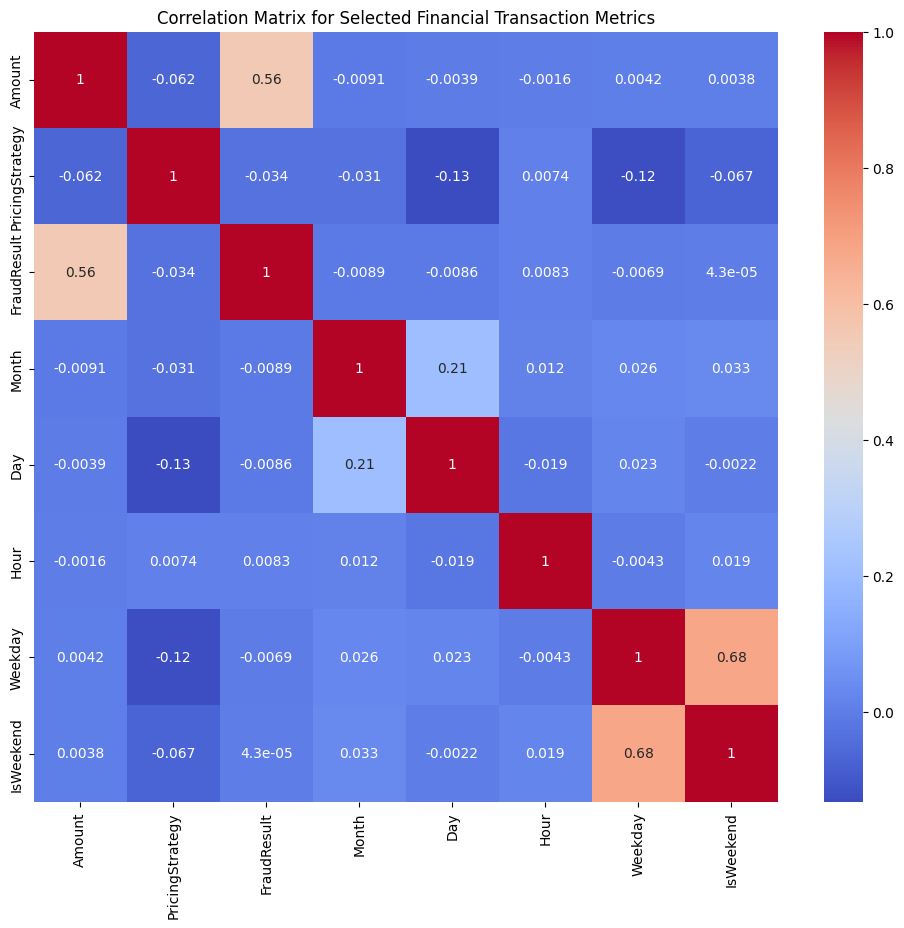

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_default, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for the previous columns')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Financial Transaction Metrics')
plt.show()

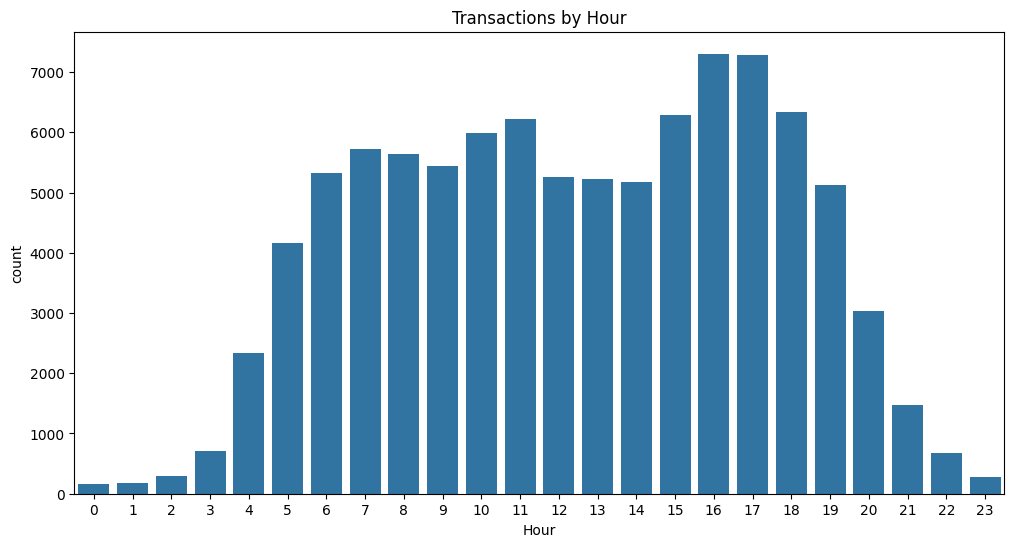

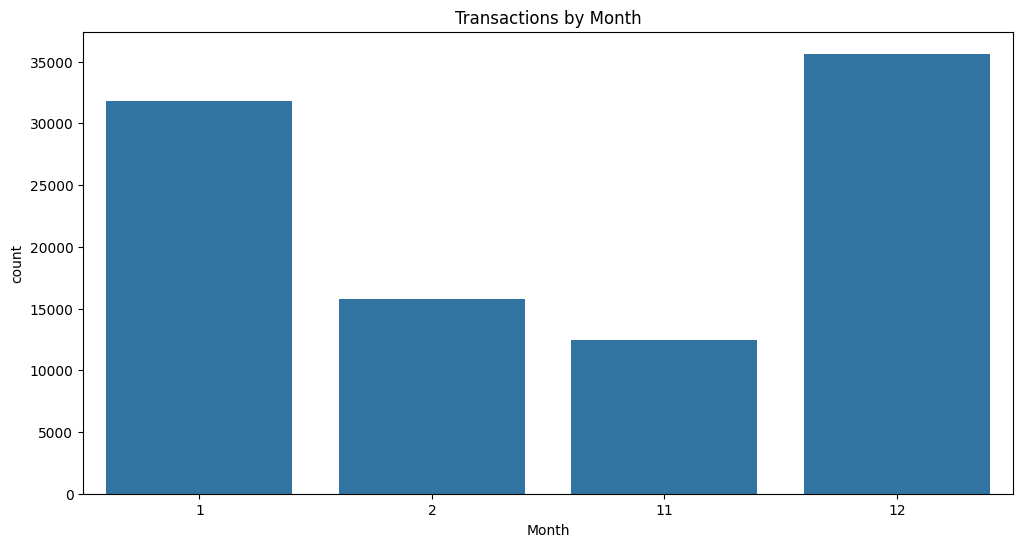

In [ ]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=transact_df)
plt.title('Transactions by Hour')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=transact_df)
plt.title('Transactions by Month')
plt.show()

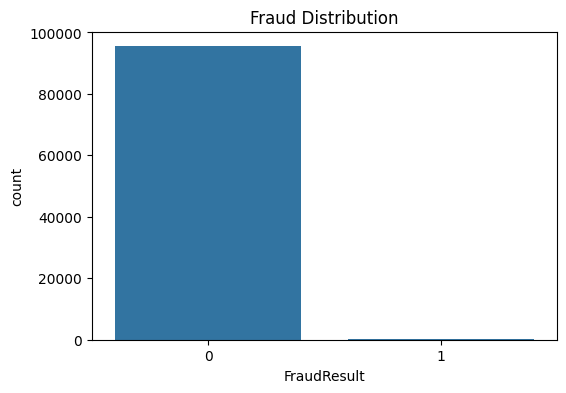

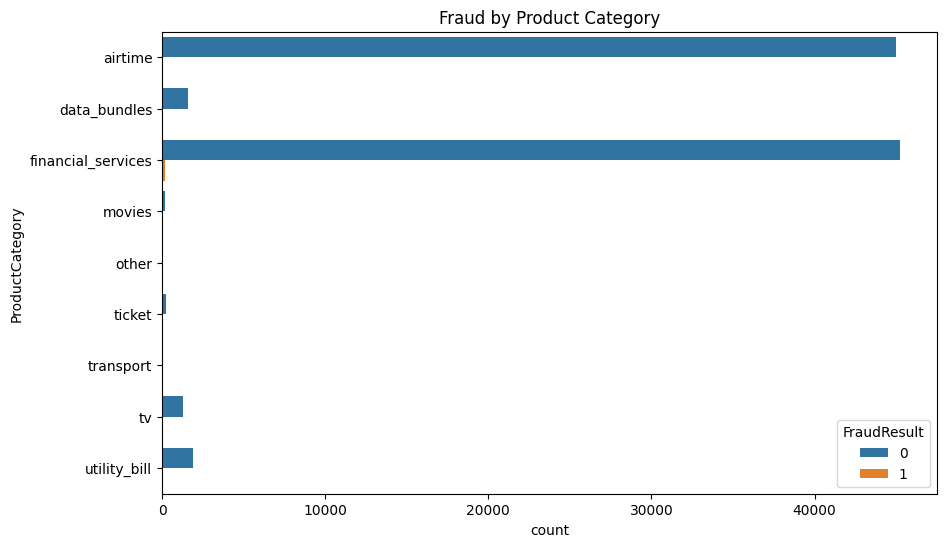

In [51]:
# Fraud Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='FraudResult', data=transact_df)
plt.title('Fraud Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='ProductCategory', hue='FraudResult', data=transact_df)
plt.title('Fraud by Product Category')
plt.show()

# **Save the Clean data**

In [55]:
# Save cleaned dataset
transact_df.to_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\Cleaned_data.csv', index=False)

# **Analysis of Your EDA Results**:

# **Data Overview**:

    * Good to confirm the overall structure and successful loading of the data.

# **Distribution of Numerical Features**:

    * The correlation matrix indicates strong positive correlation between Amount and Value (0.99).
        * This is expected, as Value is likely the absolute value of Amount.
        * Need to consider dropping one of these features to avoid multicollinearity.

    * Moderate correlation between FraudResult and both Amount (0.557) and Value (0.567).
        * This suggests that higher transaction amounts are associated with a higher probability of fraud.
        * This is a valuable insight for your model.

# **Distribution of Categorical Features**:

    * The FraudResult is heavily skewed towards 0, indicating that most transactions are not fraudulent.
        * This confirms the severe class imbalance.
    * The PricingStrategy and ProductCategory features also display significant concentrations of certain categories.
        * This indicates that some categories are more frequent than others.
        * Need to consider how to handle these categorical features during feature engineering.

# **Time-Based Analysis**:

    * Transactions peak in the late afternoon hours (around 16:00-17:00).
        * This could be due to typical user behavior or business patterns.

    * Monthly transaction frequency shows a notable increase in December, possibly due to holiday shopping.
        * This is a valuable insight for capturing seasonality.

# **Fraud Analysis**:

    * The majority of transactions are non-fraudulent, with FraudResult showing minimal occurrences of fraud (1).
    * Certain product categories, like financial_services and airtime, are relatively high in fraud occurrences.